Libraries Import

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv("Advertising.csv" , index_col=0)
df = data.copy()

In [4]:
df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
X = df["TV"]
y = df["sales"]


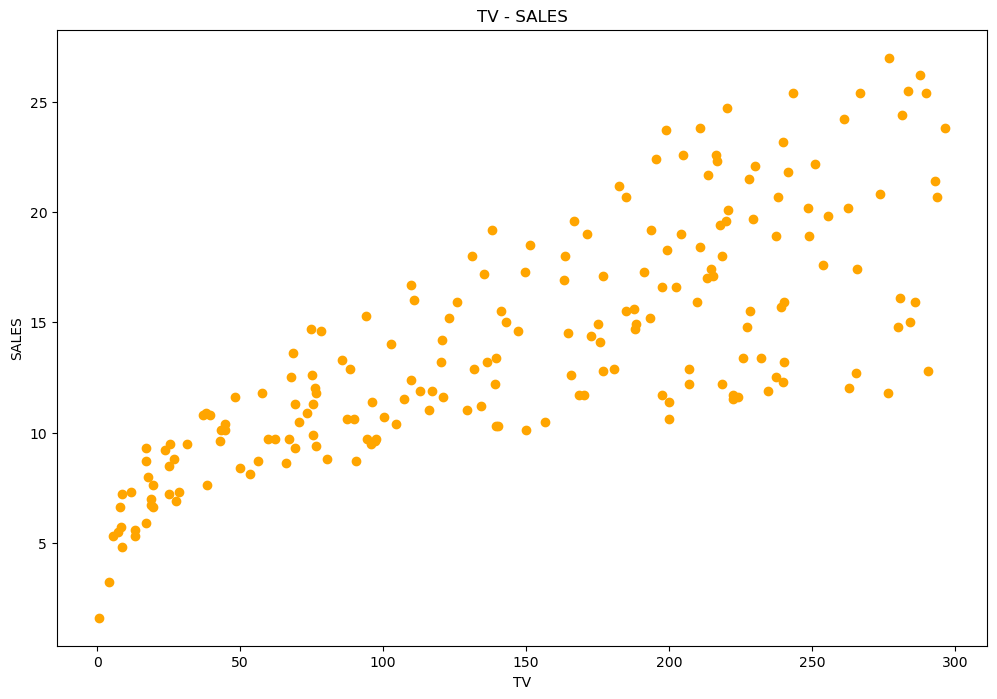

In [9]:
fig , ax = plt.subplots(figsize = (12,8))
ax.scatter(data = df , x = "TV" , y = "sales" ,color = "orange")
plt.title("TV - SALES")
plt.xlabel("TV")
plt.ylabel("SALES")
plt.show()

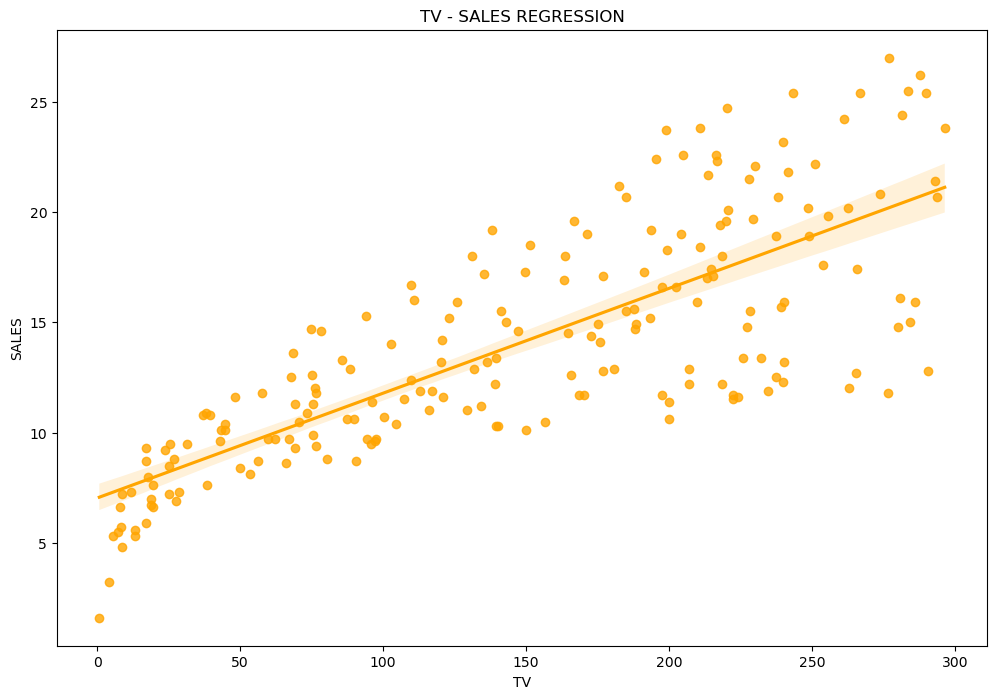

In [13]:
fig , ax = plt.subplots(figsize = (12,8))
sns.regplot(data = df , x = "TV" , y = "sales" ,color = "orange")
plt.title("TV - SALES REGRESSION")
plt.xlabel("TV")
plt.ylabel("SALES")
plt.show()

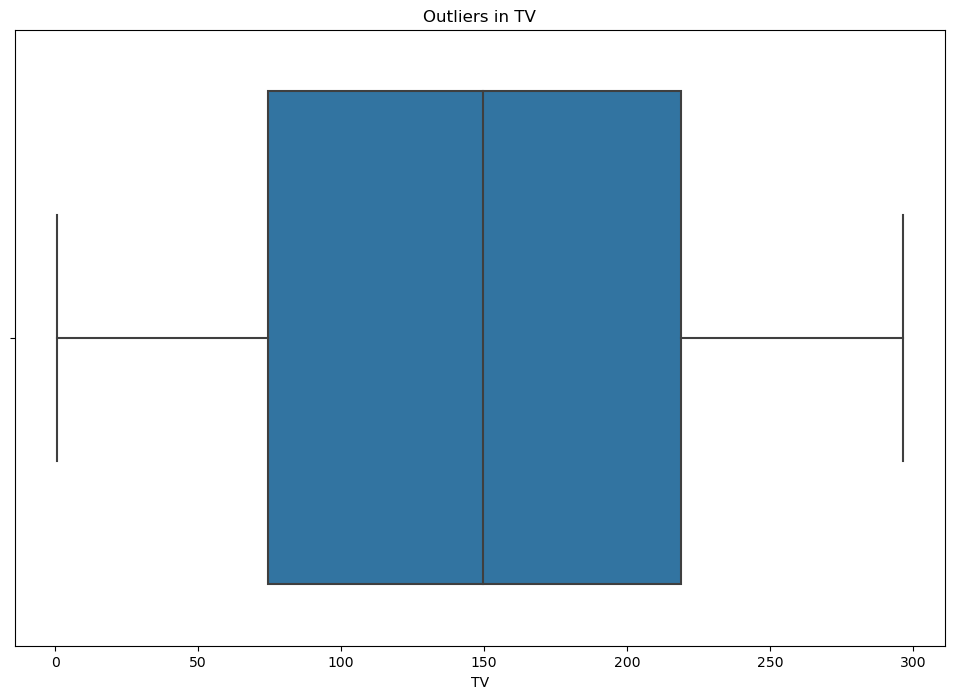

In [18]:
fig , ax = plt.subplots(figsize = (12,8))
sns.boxplot(x = "TV" , data = df)
plt.title("Outliers in TV")
plt.show()

In [20]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)
print(f"Shape of X {X.shape}")
print(f"Shape of y {y.shape}")



Shape of X (200, 1)
Shape of y (200, 1)


In [21]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=30 , random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [23]:
linear_regression.fit(X_train , y_train)

LinearRegression()

In [28]:
f"y = {linear_regression.coef_[0][0]}.x + {linear_regression.intercept_[0]}"

'y = 0.046257850864779154.x + 7.277401395470374'

In [29]:
y_pred = linear_regression.predict(X_test)

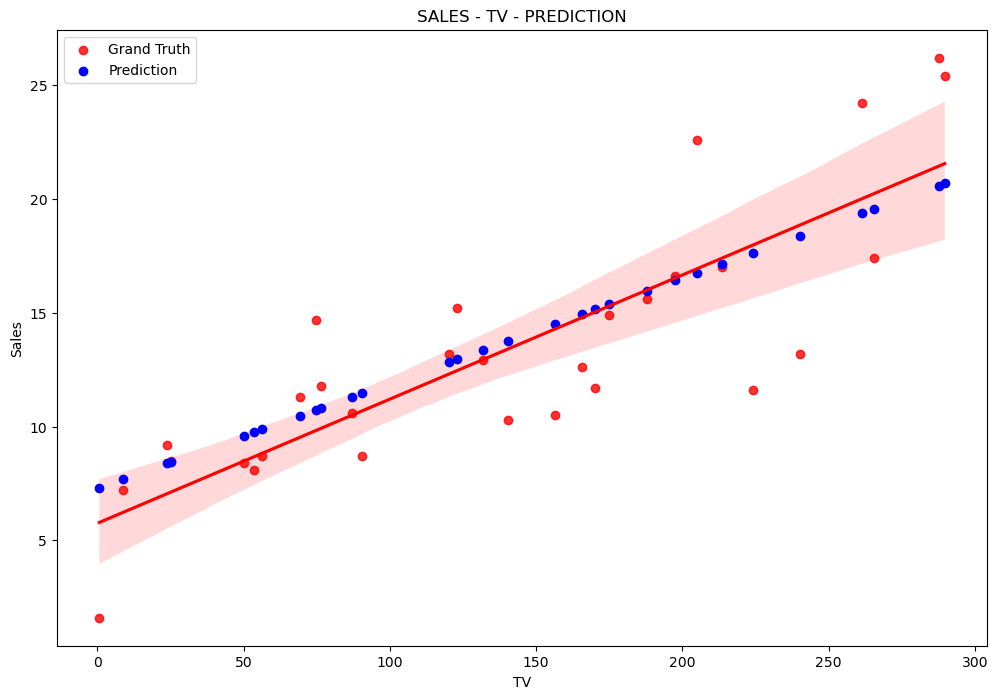

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x = X_test, y = y_test, label='Grand Truth', color='red')
ax.scatter(X_test, y_pred, label='Prediction', color='blue')
plt.title('SALES - TV - PREDICTION')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


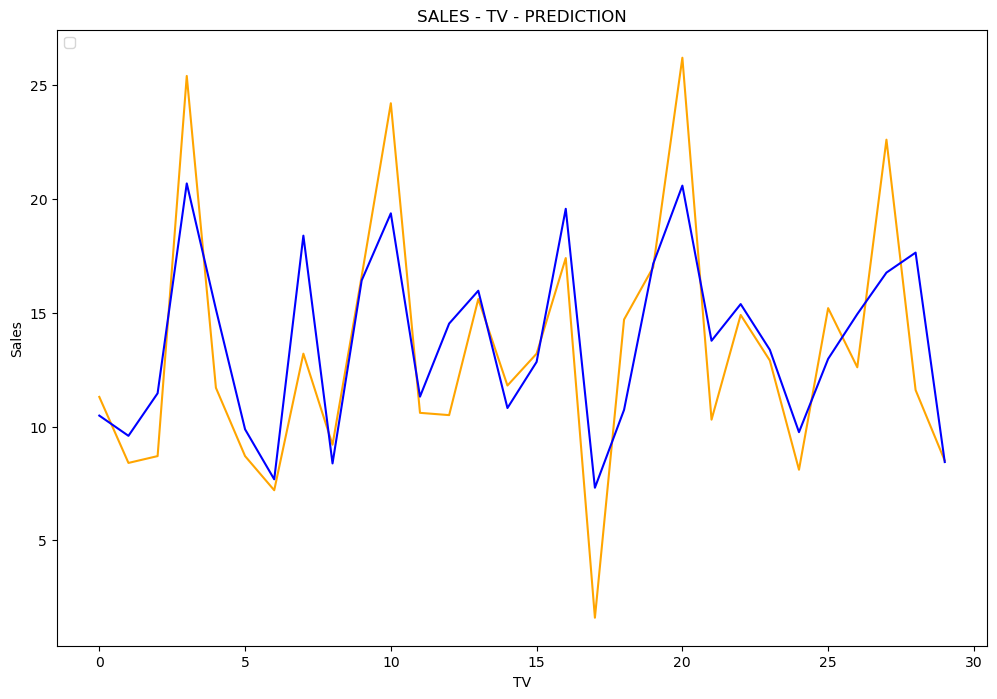

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(y_test , color = "orange")
plt.plot( y_pred , color = "blue")
plt.title('SALES - TV - PREDICTION')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

In [54]:
from sklearn.metrics import r2_score , mean_squared_error

In [56]:
r2 = r2_score(y_test , y_pred)
r2

0.6779572373473065

In [57]:
r2 * 100

67.79572373473066

In [58]:
rmse = mean_squared_error(y_test , y_pred , squared= False)
rmse

3.1370049809080904